In [146]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [147]:
df = pd.read_csv('df_merg.csv')

C:\Users\jubin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (18,20,21,22,25,26,27,30,31,32,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,75,76,77,81,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,100,101,103,111,113,114,115,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,138,141,142,143,144,145,146,147,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,189,190,191,192,193,194,195,197,198,199,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,244,246,247,248,249,250,251,253,257,260,262,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,284,285,286,295,296,297,298,299,300,301,302,303,304,305,306,311,312,313,314,315,316,317,318,319,320

In [148]:
df.columns

Index(['category', 'name', 'brand', 'flavor', 'servings', 'rating', 'flavorrating', 'reviews', 'price', 'priceperserving',
       ...
       'soy isoflavones (non-gmo)', 'wild yam (dioscorea villosa) (root)', '5-htp (5-hydroxytryptophan) (griffonia simplicifolia) (seed)', 'calcium (as calcium carbonate and calcium citrate)', 'magnesium (as magnesium oxide and magnesium citrate)', 'st johns wort extract (0.3% hypericin)(flower)', 'soy isoflavones (5% total isoflavones)', 'black cohosh extract (2.5% triterpenoid saponins)(rhizome)', 'red clover powder (aerial)', 'chaste tree extract (10:1)(fruit)'], dtype='object', length=2418)

In [149]:
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.width', 3000)

In [150]:
def flavor_simplifier(flavor):
    if 'berry' in flavor.lower():
        return 'berry'
    elif 'chocolate' in flavor.lower():
        return 'chocolate'
    elif 'vanilla' in flavor.lower():
        return 'vanilla'
    elif 'banana' in flavor.lower():
        return 'banana'
    elif 'lemon' in flavor.lower():
        return 'lemon_lime'
    elif 'lime' in flavor.lower():
        return 'lemon_lime'
    elif 'peanut butter' in flavor.lower():
        return 'pb'
    elif 'fruit' in flavor.lower():
        return 'fruit'
    elif 'melon' in flavor.lower():
        return 'melon'
    else:
        return 'other'

In [151]:
df['flavor_simp'] = df['flavor'].apply(flavor_simplifier)

In [152]:
df.flavor_simp.value_counts()

other         720
chocolate     336
berry         242
vanilla       205
lemon_lime    106
fruit         104
melon          65
banana         36
pb             29
Name: flavor_simp, dtype: int64

In [153]:
df['num_flavors'] = df['flavor'].apply(lambda x: len(x.split(' ')))

In [154]:
df['total fat'] = df['total fat'].astype(str).str.replace('g', '').astype(float)

In [155]:
df = df.drop(df[(df['total carbohydrate'] == '9 mg')].index)

In [156]:
df['total carbohydrate'] = df['total carbohydrate'].astype(str).str.replace('g', '').astype(str).str.replace('m', ' ').astype(float)

In [157]:
df['protein'] = df['protein'].astype(str).str.replace('g', '').astype(float)

In [158]:
df['dietary fiber'] = df['dietary fiber'].astype(str).str.replace('g', '').astype(float)

In [159]:
df['cholesterol'] = df['cholesterol'].astype(str).str.replace('g', '').astype(str).str.replace('m', ' ').astype(float)

In [160]:
df['total sugars'] = df['total sugars'].astype(str).str.replace('g', '').astype(float)

In [219]:
df.columns

Index(['category', 'name', 'brand', 'flavor', 'servings', 'rating', 'flavorrating', 'reviews', 'price', 'priceperserving',
       ...
       '5-htp (5-hydroxytryptophan) (griffonia simplicifolia) (seed)', 'calcium (as calcium carbonate and calcium citrate)', 'magnesium (as magnesium oxide and magnesium citrate)', 'st johns wort extract (0.3% hypericin)(flower)', 'soy isoflavones (5% total isoflavones)', 'black cohosh extract (2.5% triterpenoid saponins)(rhizome)', 'red clover powder (aerial)', 'chaste tree extract (10:1)(fruit)', 'flavor_simp', 'num_flavors'], dtype='object', length=2420)

In [218]:
df.to_csv('df.csv', index = False)

In [162]:
df_main = df[['category', 'name', 'brand', 'flavor', 'flavor_simp', 'num_flavors', 'servings', 'rating', 'flavorrating', 
              'reviews', 'price', 'priceperserving', 'calories', 'total fat', 'total carbohydrate', 'protein', 
              'dietary fiber', 'cholesterol', 'total sugars']]

In [163]:
df_main = df_main.rename(columns={"total fat": "fat_g", "total carbohydrate": "carbs_g", 
                           "protein": "protein_g", "dietary fiber": "dietary_fiber_g", "cholesterol": "cholesterol_mg", 
                            "total sugars": "sugar_g"})

In [220]:
df_main.to_csv('df_main.csv', index = False)

In [164]:
df_main.head()

,category,name,brand,flavor,flavor_simp,num_flavors,servings,rating,flavorrating,reviews,price,priceperserving,calories,fat_g,carbs_g,protein_g,dietary_fiber_g,cholesterol_mg,sugar_g
0,WHEY PROTEIN,Gold Standard 100% Whey Protein,Optimum Nutrition,delicious strawberry,berry,2,14,9.3,8.1,10031,19.99,1.43,120,1.5,3.0,24.0,0.0,40.0,0.0
1,WHEY PROTEIN,Gold Standard 100% Whey Protein,Optimum Nutrition,double rich chocolate,chocolate,3,14,9.3,8.5,10031,19.99,1.43,120,1.5,3.0,24.0,1.0,35.0,0.0
2,WHEY PROTEIN,Gold Standard 100% Whey Protein,Optimum Nutrition,vanilla ice cream,vanilla,3,14,9.3,7.8,10031,19.99,1.43,120,1.0,4.0,24.0,0.0,35.0,0.0
3,WHEY PROTEIN,Gold Standard 100% Whey Protein,Optimum Nutrition,banana cream,banana,2,29,9.3,8.4,10031,29.99,1.03,120,1.0,4.0,24.0,0.0,40.0,0.0
4,WHEY PROTEIN,Gold Standard 100% Whey Protein,Optimum Nutrition,birthday cake,other,2,27,9.3,7.4,10031,29.99,1.03,130,1.5,5.0,24.0,0.0,35.0,0.0


In [179]:
df_main.sugar_g.value_counts()

0.0    1833
1.0       7
2.0       1
3.0       1
Name: sugar_g, dtype: int64

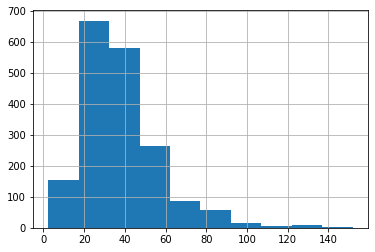

In [222]:
df_main.price.hist()

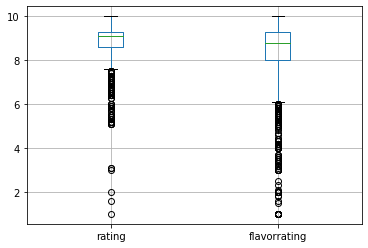

In [183]:
df_main.boxplot(column = ['rating', 'flavorrating'])

In [184]:
df_main.columns

Index(['category', 'name', 'brand', 'flavor', 'flavor_simp', 'num_flavors', 'servings', 'rating', 'flavorrating', 'reviews', 'price', 'priceperserving', 'calories', 'fat_g', 'carbs_g', 'protein_g', 'dietary_fiber_g', 'cholesterol_mg', 'sugar_g'], dtype='object')

In [193]:
df_main[['rating', 'flavorrating', 'reviews', 'price', 'priceperserving', 'calories', 'fat_g', 'carbs_g', 
         'protein_g', 'cholesterol_mg']].corr()

,rating,flavorrating,reviews,price,priceperserving,calories,fat_g,carbs_g,protein_g,cholesterol_mg
rating,1.000000,0.439515,0.165838,-0.022979,-0.056553,-0.063289,0.003627,-0.085762,0.001620,-0.008508
flavorrating,0.439515,1.000000,-0.013991,-0.065258,-0.053177,-0.042476,-0.010456,-0.033858,-0.058319,-0.030773
reviews,0.165838,-0.013991,1.000000,0.115481,-0.144361,-0.031446,-0.029162,-0.080164,0.090033,0.129836
price,-0.022979,-0.065258,0.115481,1.000000,0.170015,0.183775,0.067057,0.113917,0.322906,0.218888
priceperserving,-0.056553,-0.053177,-0.144361,0.170015,1.000000,0.584823,0.552435,0.524317,0.494189,0.363655
calories,-0.063289,-0.042476,-0.031446,0.183775,0.584823,1.000000,0.618127,0.949986,0.738313,0.752730
fat_g,0.003627,-0.010456,-0.029162,0.067057,0.552435,0.618127,1.000000,0.503114,0.592691,0.546937
carbs_g,-0.085762,-0.033858,-0.080164,0.113917,0.524317,0.949986,0.503114,1.000000,0.563805,0.666239
protein_g,0.001620,-0.058319,0.090033,0.322906,0.494189,0.738313,0.592691,0.563805,1.000000,0.705645
cholesterol_mg,-0.008508,-0.030773,0.129836,0.218888,0.363655,0.752730,0.546937,0.666239,0.705645,1.000000


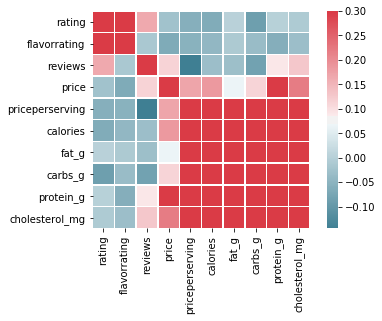

In [194]:
sns.heatmap(df_main[['rating', 'flavorrating', 'reviews', 'price', 'priceperserving', 'calories', 'fat_g', 'carbs_g', 
         'protein_g', 'cholesterol_mg']].corr(), 
            vmax = 0.3, square = True, linewidths = 0.5, cmap = sns.diverging_palette(220, 10, as_cmap = True))

In [195]:
df_cat = df_main[['category', 'name', 'brand', 'flavor', 'flavor_simp']]

graph for category: total = 22


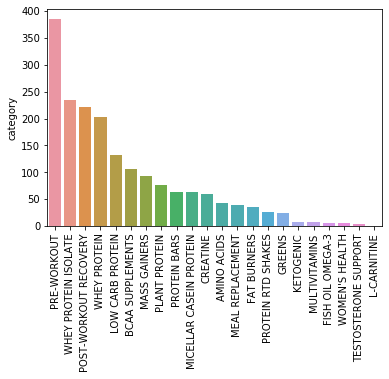

graph for name: total = 507


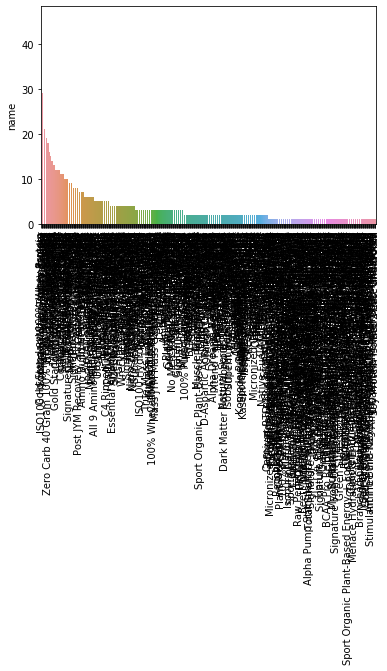

graph for brand: total = 94


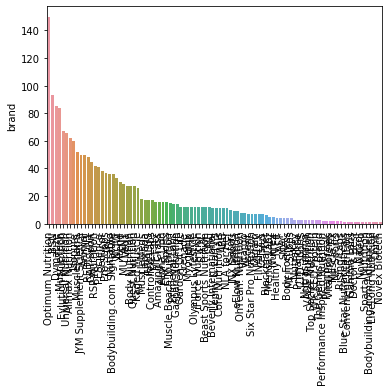

graph for flavor: total = 579


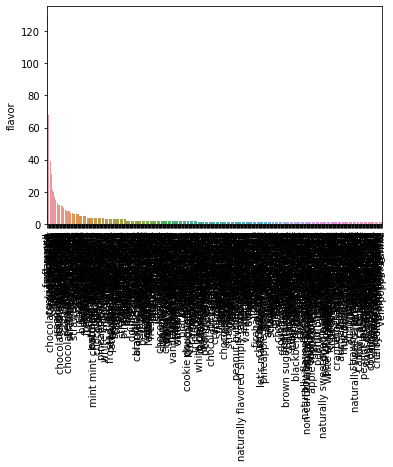

graph for flavor_simp: total = 9


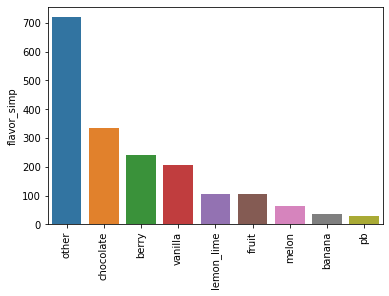

In [197]:
for i in df_cat.columns: 
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [199]:
pd.pivot_table(df_main, index = "flavor_simp", values = "priceperserving")

,priceperserving
flavor_simp,
banana,1.896667
berry,1.460041
chocolate,1.914507
fruit,1.197019
lemon_lime,1.038208
melon,1.150923
other,1.281431
pb,2.026897
vanilla,1.861463


In [203]:
pd.pivot_table(df_main, index = ['flavor_simp', 'num_flavors'], values = "priceperserving")

priceperserving
flavor_simp num_flavors                 
banana      1                   2.431429
            2                   1.295000
            3                   2.622000
            4                   1.730000
berry       1                   1.695405
            2                   1.427658
            3                   1.442927
            4                   0.992500
            5                   0.950000
chocolate   1                   1.862836
            2                   1.887836
            3                   1.896095
            4                   2.204400
            5                   2.345000
fruit       2                   1.218791
            3                   1.073333
            4                   0.700000
lemon_lime  1                   1.140000
            2                   0.977342
            3                   1.127647
            4                   1.707500
melon       1                   1.005111
            2                   1.662143
            3                   1.086000
            4                   0.880000
other       1                   0.832804
            2                   1.341324
            3                   1.789712
            4                   1.632000
            5                   1.615714
pb          2                   1.431250
            3                   2.087059
            4                   2.962500
vanilla     1                   1.772500
            2                   1.898966
            3                   1.938958
            4                   1.395000

In [217]:
pd.pivot_table(df_main, index = ['category'], values = 'priceperserving').sort_values("priceperserving", ascending = False)

,priceperserving
category,
PROTEIN RTD SHAKES,4.107407
MASS GAINERS,3.432872
PLANT PROTEIN,2.427237
MEAL REPLACEMENT,2.367750
PROTEIN BARS,2.213594
WOMEN'S HEALTH,1.900000
WHEY PROTEIN,1.663695
KETOGENIC,1.620000
MICELLAR CASEIN PROTEIN,1.559531
